<table>
 <tr align=left><td><img align=left src="https://mirrors.creativecommons.org/presskit/buttons/80x15/png/by.png">
 <td>This notebook is provided under the Creative Commons Attribution license, CC-BY 4.0. All code is made available under MIT License (c) Arash Sarshar.</td>
 <td> </td>
</table>

---
Running notebook on colab.

**Do not run this if it is on a local machine.**

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/PR/Fall-23-APML-Public-main/Assignements/HW1

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/PR/Fall-23-APML-Public-main/Assignements/HW1




---



## Some ground rules for writing good responses in your assignments

* Make sure that you provide ample comments to communicate what you are trying to do clearly. Do not assume that anyone reading the code would immediately  understand the context.
* If you need to create new variables, think about naming them in descriptive ways.
* Each and every output should be reproducible. If you are creating a plot, make sure you include the code for that plot.
* Cite your references, including AI ones.


## Let's load the lemon picture again

In [2]:
import numpy as np
from numpy.linalg import *
from PIL import Image
import matplotlib.pyplot as plt

PIL stands for Python Imaging Library, and it provides the necessary tools and functions for handling images in Python. It is used for image processing, manipulation, and analysis.

In [3]:
image = np.array(Image.open('../../Images/lemon.jpeg'))

## Part 1

Write a block of commands that does the following.  

1. Print the shape of the image
1. Create a new variable called `img_single_channel` that is equivalent to __the last color channel__ of `image`
3. Print the shape of `img_single_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  `img_single_channel`





Shape of image: (100, 100, 3)
Shape of img_single_channel: (100, 100, 1)


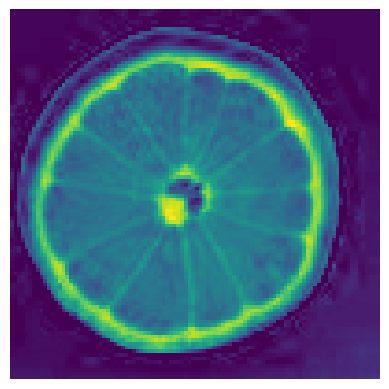

In [4]:
print('Shape of image:',image.shape)

channel1, channel2, channel3 = np.dsplit(image, image.shape[-1])
img_single_channel = channel3

print('Shape of img_single_channel:', img_single_channel.shape)

plt.imshow(img_single_channel)
plt.axis('off')
plt.show()

>1. The shape of the image is (100, 100, 3)

>2. Spliting array into multiple sub-arrays along the 3rd axis using the function `numpy.dsplit`
   https://numpy.org/doc/stable/reference/generated/numpy.dsplit.html

>3. The shape of img_single_channel is (100, 100, 1). The number of pixels are the same in both images. Both are 100x100 images.**bold text**



## Part 2

Write a block of commands that does the following.  

1. Create a new variable called `img_average_channel` that is equivalent to __the average of all three color channels__ of `image`
3. Print the shape of `img_average_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  the original image in `image`, compare the result with the result of `Part 1`, and comment on the differences and which one you would say is better

Shape of img_average_channel: (100, 100)


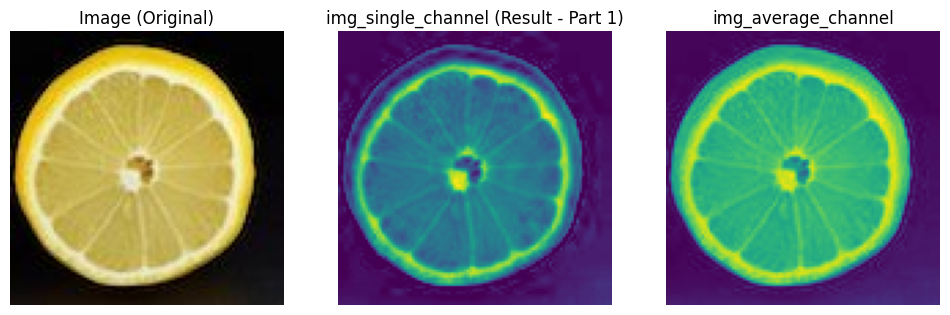

In [5]:
img_average_channel = np.mean(image, axis = 2)

print("Shape of img_average_channel:", img_average_channel.shape)

# Plot image, img_single_channel and img_average_channel
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(12,8)

axs[0].imshow(image)
axs[0].set_title("Image (Original)")
axs[0].axis('off')

axs[1].imshow(img_single_channel)
axs[1].set_title("img_single_channel (Result - Part 1)")
axs[1].axis('off')

axs[2].imshow(img_average_channel)
axs[2].set_title("img_average_channel")
axs[2].axis('off')

plt.show()

>2. The shape of img_average_channel is (100, 100) which is the same as that of the original image.

>3. The difference is that there is more yellow in the third image. The intensity values from the first two channels are not present in the second one. Which makes the third image better.

## Part 3

1. Describe what an identity matrix is. What does multiplying with an identity matrix do?
1. Create an identity matrix called `identity_matrix` that has the same size as `img_average_channel`.
2. Print a random row out of `identity_matrix` and describe your observations.

In [6]:
identity_matrix = np.identity(img_average_channel.shape[0])
print('Shape of identity matrix:', identity_matrix.shape)
rand_int = np.random.randint(99)
print('Random row:', identity_matrix[rand_int])
print('Row number =', rand_int)
print('Index of 1 in that row = ', np.where(identity_matrix[rand_int] == 1)[0][0])

Shape of identity matrix: (100, 100)
Random row: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
Row number = 9
Index of 1 in that row =  9


>1. The identity matrix is a square matrix with ones on the main diagonal and zeros elsewhere. Any matrix remains the same when multiplied with the identity matrix.

>2. `np.identity` function is used to make a identity matrix. https://numpy.org/doc/stable/reference/generated/numpy.identity.html

>3. We can observe that there is only one element that has the value 1 and the rest, 0. And the element that has the value 1 is part of the diagonal element. This observation is done by checking any random row and the index of 1 in it. The index and the row number will have the same value.

## Part 4

We are going to use `identity_matrix` to scramble the rows and columns of `img_average_channel`.

1. First, create a numpy array that contains the numbers $0,1, \cdots, N$ where $N$ is the number of rows in the image.

2. Use `numpy.random.shuffle` to shuffle the indices. Call the shuffled array, `rows`

4. Print `rows` and inspect the elements.

In [7]:
rows = np.arange(img_average_channel.shape[0])
np.random.shuffle(rows)
print(rows)

[79 47 42  3 13 82 88 23 91  5 94 65 54 71  6 96 81 35  4 83 74 51  2 76
 46 58 32 77 12 85 59  8 41 20 43 14 93 34 15 56 45 19 86 64 38 70 75 28
 95 17 72 49 61  9 16 44 21 66 53 67 36 11 60 90 84 57 27 62 24 22 10 18
 55 29 69 52 68 98 89 33 99 40 92 26 73  1 63 78 31 80 37 25 48 87 50 30
 97 39  0  7]


>1. An array of size N, with numbers from 0 to N-1 is created using `numpy.arange` function.
https://numpy.org/doc/stable/reference/generated/numpy.arange.html

>3. Since the shape of the image is (100,100), a numpy array having numbers from 0 to 99 (shuffled) is created.

## Part 5

1. Use your array of random row indices to create a new matrix `T` from `identity_matrix`. Overall, `T` has the same elements as `identity_matrix`, but the order of the rows of `T` should be according to the variable `rows`
2. Take a moment to think about what we are doing here. Describe in your own words what matrix `T` is.
3. Sanity check, print the shape of `T` and make sure it is the same size as `identity_matrix` and `img_average_channel`. If you need to,  reshape it to have the same size.


In [8]:
T = identity_matrix[rows, :]
print('Shape of T:', T.shape)
print('Shape of identity_matrix:', identity_matrix.shape)
print('Shape of img_average_channel:', img_average_channel.shape)

Shape of T: (100, 100)
Shape of identity_matrix: (100, 100)
Shape of img_average_channel: (100, 100)


>2. Matrix T is the identity matrix but with the rows shuffled.

>3. The shape of T, identity_matrix and img_average_channel are the same.

## Part 6

1. Matrix multiply `T` and `img_average_channel` and store the result in `transformed_image`. Check the shape of the result.
2. Plot `transformed_image` and describe the pattern you see.
3. Think about what each dot product in the matrix multiplication is doing. Describe in your own words what this transformation is doing to the original image.

Shape of transformed_image: (100, 100)


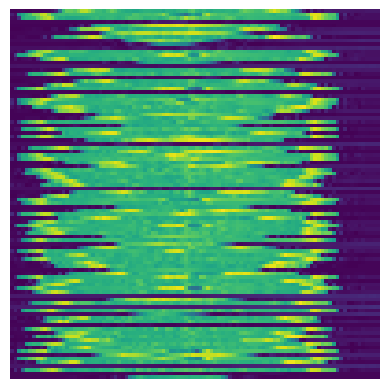

In [9]:
transformed_image = np.matmul(T, img_average_channel)
print('Shape of transformed_image:', transformed_image.shape)
plt.imshow(transformed_image)
plt.axis('off')
plt.show()

>1. The shape of transformed_image is (100, 100).

>2. The pattern is of horizontal lines of varying length from top to bottom.

>3. The multiplication is done on a shuffled identity matrix. Therefore, the rows of transformed_image are also shuffled/scrambled in the same order.

## Part 7

1. We now want to retrieve the original image. Is matrix `T` invertible? How would you show that it is invertible?
2. Compute the inverse and store the matrix in `Tinv`.
3. Perform the inverse of the scrambling operation and plot the result to show that you retrieved the original image.

Determinant of transformed_image: 4.167606051358726e+155


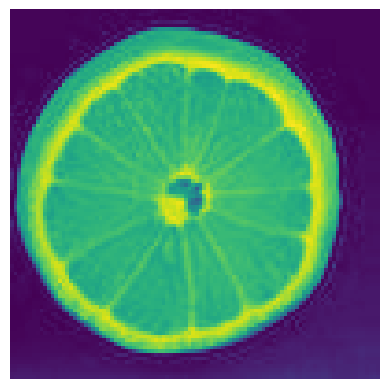

Original image retrieved: True


In [10]:
print("Determinant of transformed_image:", np.linalg.det(transformed_image))

Tinv = np.linalg.inv(T)

inverse_scramble = np.matmul(Tinv, transformed_image)
plt.imshow(inverse_scramble)
plt.axis('off')
plt.show()

#Check if the image before scrambling and after reversing the scramble is the same.
print("Original image retrieved:", np.array_equal(inverse_scramble, img_average_channel))

>1. T is invertible in this case. T is invertible if its determinant is not 0. This can be checked with the help of `np.linalg.det` function. https://numpy.org/doc/stable/reference/generated/numpy.linalg.det.html

>3. The original image is retrieved. A check is also done to make sure that two the matrices(inverse_scramble and img_average_channel) are the same.

## Part 8: Extra Points

* We want to perform the same operations but on the columns of the original image. How would you do the matrix algebra? Plot the scrambled image for the proof of concept.


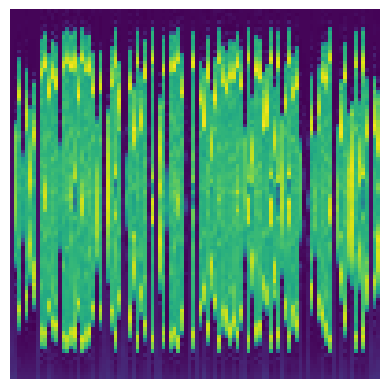

In [11]:
transformed_image_col = np.matmul(img_average_channel, T)
plt.imshow(transformed_image_col)
plt.axis('off')
plt.show()

It can be achieved simply by inter-changing the position of both the matrices (original and shuffled identity matrix i.e. T) during multiplication. T is reused in the code.

## Extra Points

* Now can you perform the scrambling on __both the columns and rows__ of the original image?  Write the code and plot the scrambled image. Then invert the operations and show that you can recover the original image.

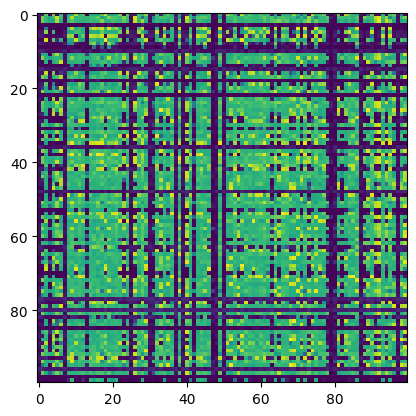

In [12]:
transformed_image_col_row = np.matmul(T, transformed_image_col)
plt.imshow(transformed_image_col_row)
plt.show()

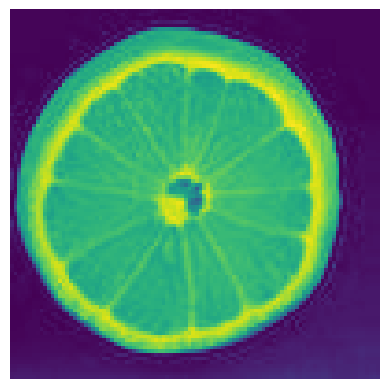

In [13]:
inverse_row = np.matmul(Tinv, transformed_image_col_row)
inverse_row_col = np.matmul(inverse_row, Tinv)
plt.imshow(inverse_row_col)
plt.axis('off')
plt.show()

The image can be inverted completely be multiplying with `Tinv` twice.